### Before continuing, make sure you have Wiki DB installed and in the same directory as this program. See README for link

## Description of Data Set and CNN goal
The Convolutional Neural Network (CNN) built in this project aims to recognize and classify images of faces based on the provided metadata. <br>
Specifically, the CNN will be trained to:
Identify the Gender and Predict the Age of a person based on their face.

## Import Dependencies 

In [1]:
import scipy.io
import os
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime, timedelta
import splitfolders
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D




## Load Relevant Metadata

In [2]:
# Path to the local dataset directory
data_dir = './wiki'

# Path to the metadata file
metadata_file = os.path.join(data_dir, 'wiki.mat')

# Load the metadata from the .mat file
metadata = scipy.io.loadmat(metadata_file)
# Extract the relevant metadata
wiki_data = metadata['wiki'][0, 0]
image_paths = wiki_data['full_path'][0]
names = wiki_data['name'][0]
genders = wiki_data['gender'][0]
birthdates = wiki_data['dob'][0]
face_scores = wiki_data['face_score'][0]
photo_taken = wiki_data['photo_taken'][0]
# MATLAB's reference date (0 days since year 0)
reference_date = datetime(1, 1, 1)



## Visualize 5 examples 

test


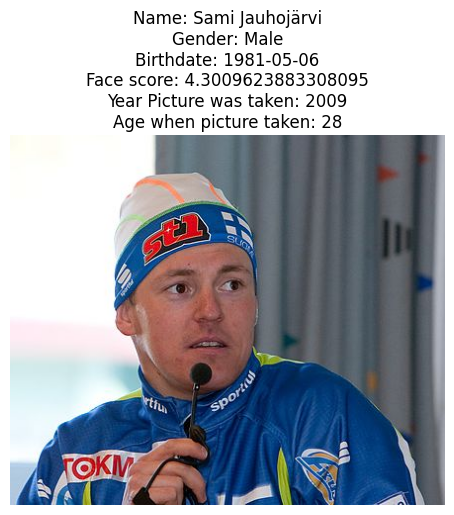

test


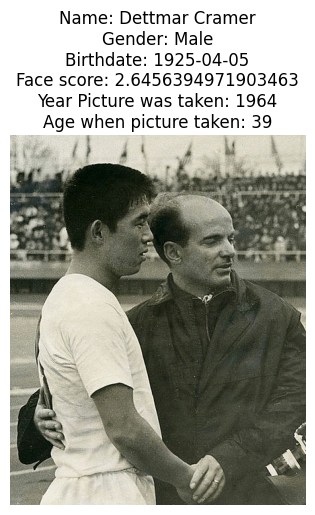

test


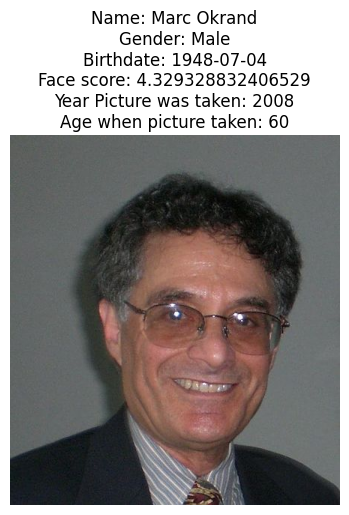

test


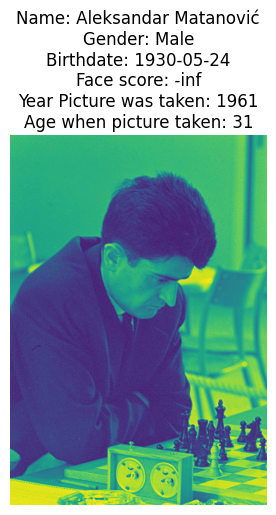

test


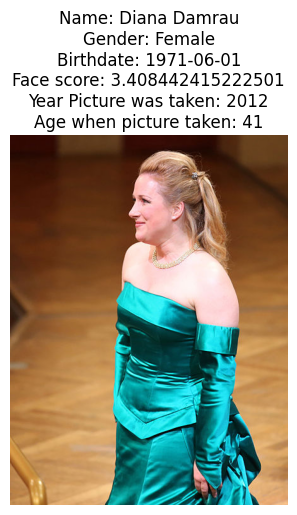

In [3]:
# Function to convert MATLAB serial date number to a readable date
def convert_dob(dob):
    reference_date = datetime(1, 1, 1)
    days_since_reference = int(dob)
    actual_date = reference_date + timedelta(days=days_since_reference - 366)
    return actual_date.strftime("%Y-%m-%d")  # Format as Year-Month-Day

# Function to display an image with its metadata
def display_image_with_metadata(image_path, name, gender, dob, face_score, photo_taken):
    # Construct the full image path
    full_image_path = os.path.join(data_dir, image_path[0])
    birthdate_str = convert_dob(dob)

    # Open and display the image
    image = Image.open(full_image_path)
    plt.imshow(image)
    plt.imshow(image)
    title = (f"Name: {name[0]}\n"
            f"Gender: {'Male' if gender == 1 else 'Female' }\n"
             f"Birthdate: {birthdate_str}\n"
             f"Face score: {face_score}\n"
             f"Year Picture was taken: {photo_taken}\n"
             # Can be off by 1 year, since db does not have month/day picture was taken
             f"Age when picture taken: {photo_taken - int(birthdate_str[:4])}"
             )
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display a few images with their metadata
for i in range(5):
    print("test")
    display_image_with_metadata(image_paths[i], names[i], genders[i], birthdates[i], face_scores[i], photo_taken[i])
    

## Split Data


In [4]:
# Split data between training and testing
# Check if the directory with split data already exists
if not os.path.exists("./wiki_split_data"):
    # Split data between training and testing
    splitfolders.ratio('./wiki', output="./wiki_split_data", seed=1337, ratio=(0.7, 0.15, 0.15))


## Build Model

In [5]:
# Initialize the CNN
model = Sequential()


# Adjust parameters as needed
model.add(Conv2D(
    filters=32,                
    kernel_size=(3, 3),       
    padding='same',            
    activation='relu',         
    input_shape=(64, 64, 3)    
))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-02 15:47:59.095024: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-10-02 15:47:59.095045: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-02 15:47:59.095053: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-02 15:47:59.095584: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-02 15:47:59.095791: I tensorflow/core/common_runtime/pluggable_device/plu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)